In [8]:
library(tidyverse)
library(repr)
library(tidymodels)

set.seed(1234)

#this library() function loads the tidymodels, repr, and tidyverse libraries into R
#the set.seed() function sets the seed for the project

In [9]:
data <- read_csv("atp2017-2019.csv")
#the tennnis player data is referred to as the object "data" throughout this analysis

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



In [10]:
data <- data%>%
    select(winner_name, minutes, w_ace, w_df, w_svpt, w_SvGms, w_1stIn, w_1stWon)%>%
#the columns relevant to our analysis are selected using this select() function
    filter(!is.na(winner_name), !is.na(minutes), !is.na(w_ace), !is.na(w_df), !is.na(w_svpt),
          !is.na(w_SvGms), !is.na(w_1stIn), !is.na(w_1stWon))
#the !is.na() argument in the filter() function eliminates NA values in the relevant columns

data

winner_name,minutes,w_ace,w_df,w_svpt,w_SvGms,w_1stIn,w_1stWon
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Kei Nishikori,124,3,3,77,13,44,31
Daniil Medvedev,82,10,1,52,10,33,28
Kei Nishikori,66,2,2,47,8,33,26
Jo Wilfried Tsonga,106,12,2,68,11,43,34
Daniil Medvedev,129,12,3,105,16,68,48
Jeremy Chardy,127,10,8,94,16,58,44
Kei Nishikori,100,5,2,59,12,47,37
Jo Wilfried Tsonga,100,11,3,64,10,37,30
Alex De Minaur,80,1,1,49,9,38,29


In [11]:
data <- data%>%
    group_by(winner_name)%>%
    summarize(number_of_wins = n(), avg_duration = mean(minutes), avg_ace = mean(w_ace),
             avg_df = mean(w_df), avg_svpt = mean(w_svpt), avg_svgm = mean(w_SvGms), avg_first = mean(w_1stIn),
             avg_first_won = mean(w_1stWon))%>%
    select(winner_name, number_of_wins, avg_duration, avg_ace, avg_df, avg_svpt, avg_svgm, avg_first, avg_first_won)
data

`summarise()` ungrouping output (override with `.groups` argument)



winner_name,number_of_wins,avg_duration,avg_ace,avg_df,avg_svpt,avg_svgm,avg_first,avg_first_won
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adam Pavlasek,3,124.66667,11.333333,3.666667,101.66667,17.00000,71.66667,54.66667
Adrian Mannarino,80,111.78750,6.087500,2.237500,79.97500,12.77500,48.83750,35.83750
Adrian Menendez Maceiras,4,120.00000,7.250000,2.500000,86.50000,12.50000,55.25000,39.75000
Akira Santillan,2,44.50000,4.000000,1.500000,43.00000,7.50000,26.00000,22.00000
Albert Ramos,72,125.51389,3.972222,2.319444,83.45833,12.97222,52.37500,37.63889
Alejandro Davidovich Fokina,3,88.66667,3.000000,2.666667,72.00000,11.66667,53.66667,36.33333
Alejandro Gonzalez,2,76.00000,2.000000,2.500000,60.50000,10.00000,39.00000,25.50000
Alessandro Giannessi,6,148.00000,4.666667,4.000000,101.50000,14.50000,69.33333,46.83333
Alex Bolt,3,163.00000,8.666667,3.000000,112.66667,18.33333,63.66667,48.33333


In [12]:
data <- data%>%
    mutate(total_avg_svpt = avg_svpt + avg_svgm, first_win_percentage_avg = (avg_first_won/avg_first)*100)%>%
    select(winner_name, number_of_wins, avg_duration, avg_ace, avg_df, total_avg_svpt, first_win_percentage_avg)%>%
    mutate(number_of_wins = as.double(number_of_wins), avg_duration = round(avg_duration, 2), avg_ace = round(avg_ace, 2),
           avg_df = round(avg_df, 2), total_avg_svpt = round(total_avg_svpt, 2), first_win_percentage_avg = round(first_win_percentage_avg, 2))
data

winner_name,number_of_wins,avg_duration,avg_ace,avg_df,total_avg_svpt,first_win_percentage_avg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adam Pavlasek,3,124.67,11.33,3.67,118.67,76.28
Adrian Mannarino,80,111.79,6.09,2.24,92.75,73.38
Adrian Menendez Maceiras,4,120.00,7.25,2.50,99.00,71.95
Akira Santillan,2,44.50,4.00,1.50,50.50,84.62
Albert Ramos,72,125.51,3.97,2.32,96.43,71.86
Alejandro Davidovich Fokina,3,88.67,3.00,2.67,83.67,67.70
Alejandro Gonzalez,2,76.00,2.00,2.50,70.50,65.38
Alessandro Giannessi,6,148.00,4.67,4.00,116.00,67.55
Alex Bolt,3,163.00,8.67,3.00,131.00,75.92


In [13]:
data_split <- initial_split(data, prop = 0.75, strata = number_of_wins)
data_train <- training(data_split)
data_test <- testing(data_split)

data_train

winner_name,number_of_wins,avg_duration,avg_ace,avg_df,total_avg_svpt,first_win_percentage_avg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adam Pavlasek,3,124.67,11.33,3.67,118.67,76.28
Adrian Mannarino,80,111.79,6.09,2.24,92.75,73.38
Adrian Menendez Maceiras,4,120.00,7.25,2.50,99.00,71.95
Akira Santillan,2,44.50,4.00,1.50,50.50,84.62
Albert Ramos,72,125.51,3.97,2.32,96.43,71.86
Alexander Bublik,19,123.95,18.53,9.16,117.11,79.26
Alexander Zverev,136,104.99,9.04,3.51,88.37,77.28
Alexey Vatutin,2,106.00,0.50,1.50,93.50,70.30
Aljaz Bedene,52,113.33,9.31,2.17,90.87,78.18


In [14]:
train_summmary <- data_train%>%
    tibble(number_of_players = nrow(data_train),
           avg_match_duration = mean(avg_duration),
           avg_ace_n = mean(avg_ace),
           avg_df_n = mean(avg_df),
           avg_total_avg_svpt = mean(total_avg_svpt),
           avg_first_win_percentage_avg = mean(first_win_percentage_avg),
           top_win_n = max(number_of_wins), 
           bottom_win_n = min(number_of_wins))%>%
    select(number_of_players, avg_match_duration, avg_ace_n, avg_df_n, avg_total_avg_svpt, avg_first_win_percentage_avg, top_win_n, bottom_win_n)%>%
    slice(1)%>%
    mutate(number_of_players = as.double(number_of_players), avg_match_duration = round(avg_match_duration, 2), avg_ace_n = round(avg_ace_n, 2),
           avg_df_n = round(avg_df_n, 2), avg_total_avg_svpt = round(avg_total_avg_svpt, 2), avg_first_win_percentage_avg = round(avg_first_win_percentage_avg, 2))
train_summmary

number_of_players,avg_match_duration,avg_ace_n,avg_df_n,avg_total_avg_svpt,avg_first_win_percentage_avg,top_win_n,bottom_win_n
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
191,112.04,6.94,2.88,95.32,75.39,150,1


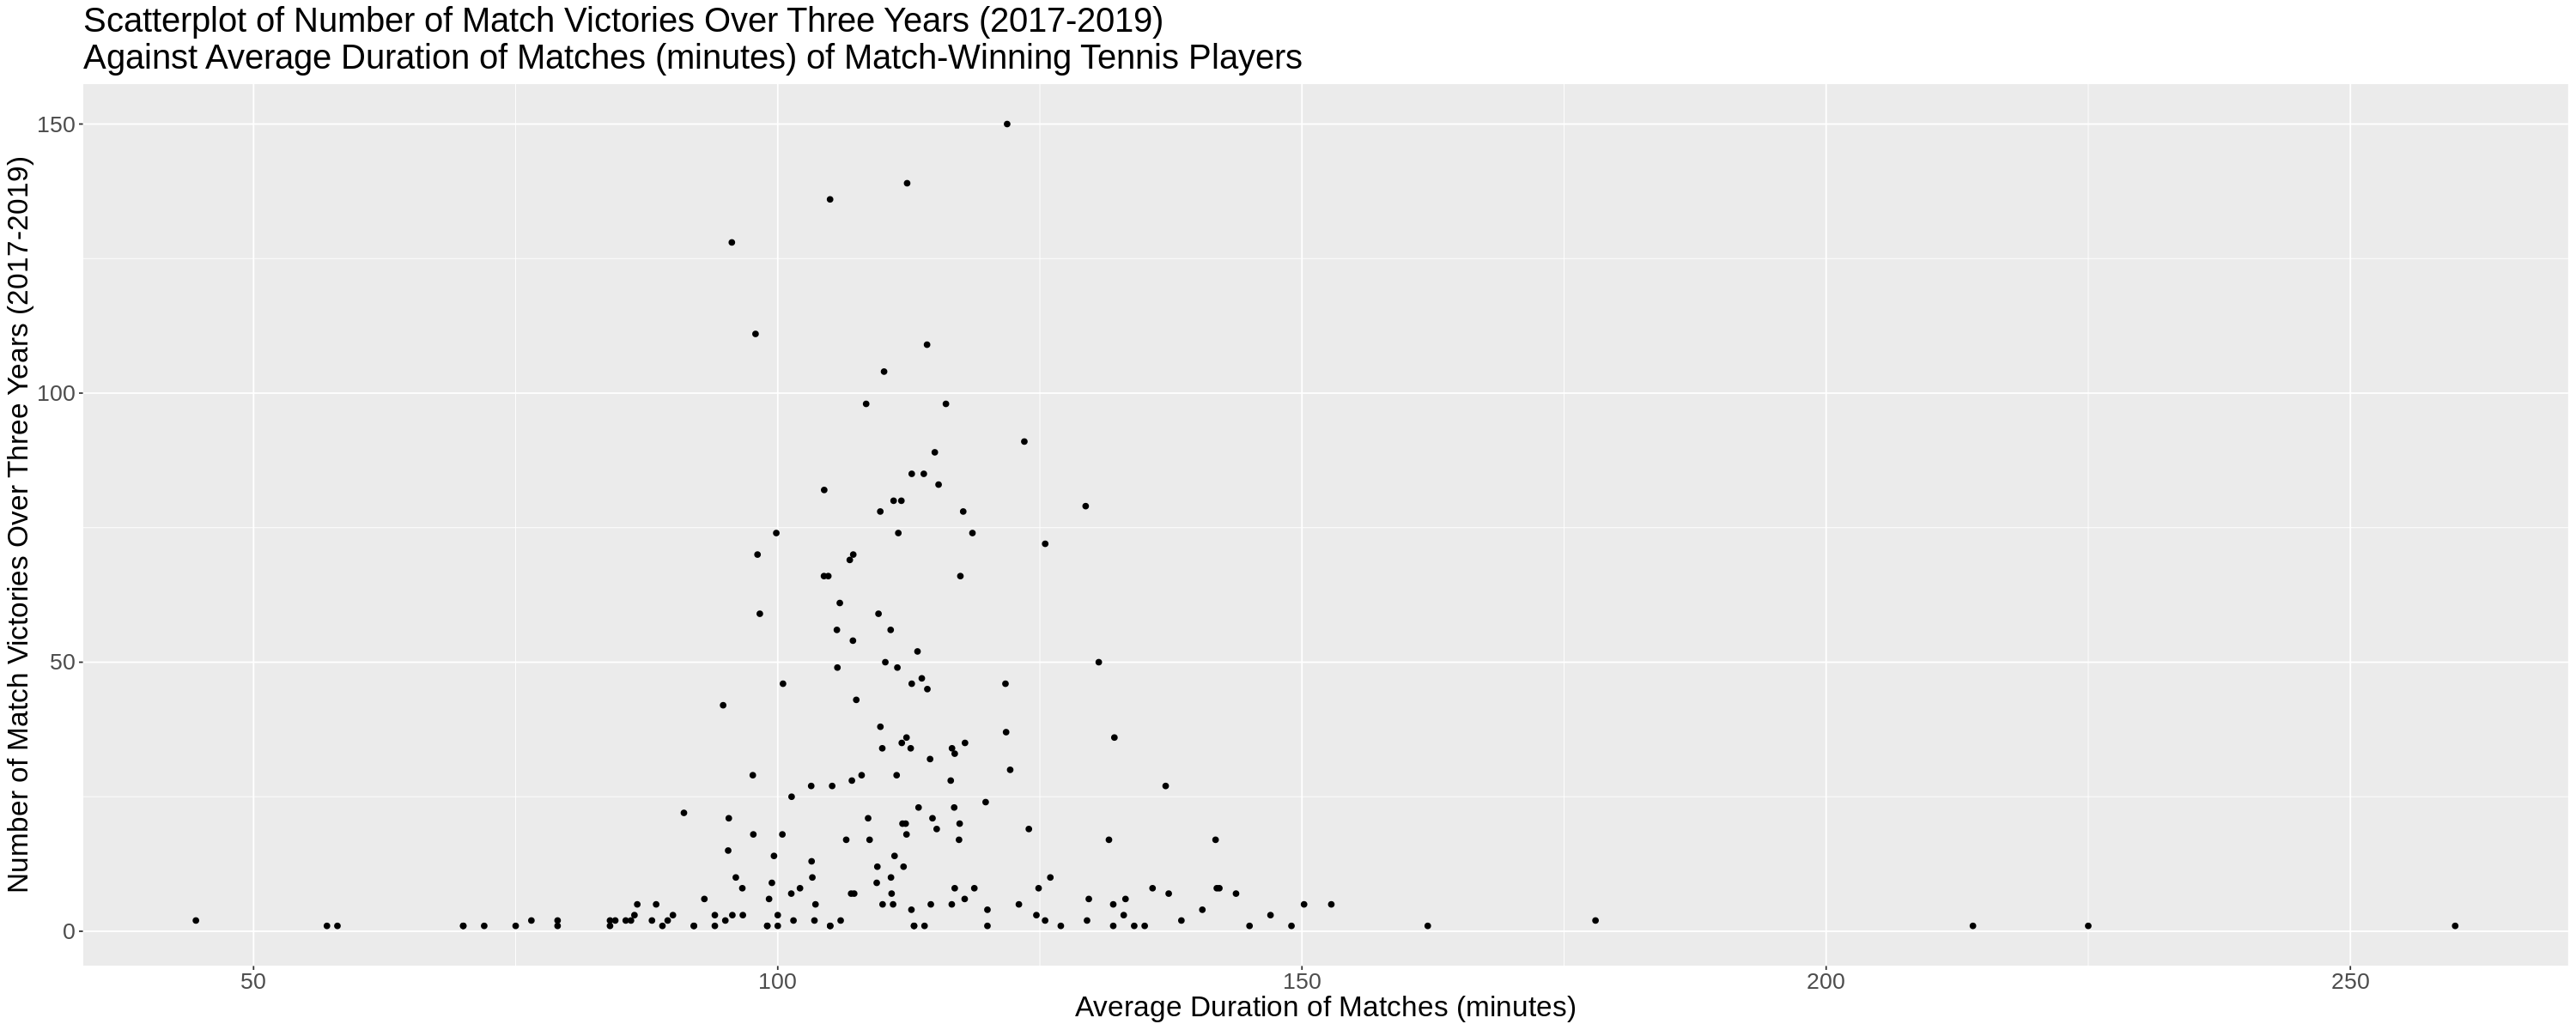

In [15]:
options(repr.plot.width = 25, repr.plot.height = 10)

duration_scatterplot <- data_train%>%
    ggplot(aes(x=avg_duration, y=number_of_wins))+
    geom_point()+
    theme (text = element_text (size = 20))+
    labs(x="Average Duration of Matches (minutes)", y="Number of Match Victories Over Three Years (2017-2019)")+
    ggtitle("Scatterplot of Number of Match Victories Over Three Years (2017-2019)\nAgainst Average Duration of Matches (minutes) of Match-Winning Tennis Players")
duration_scatterplot

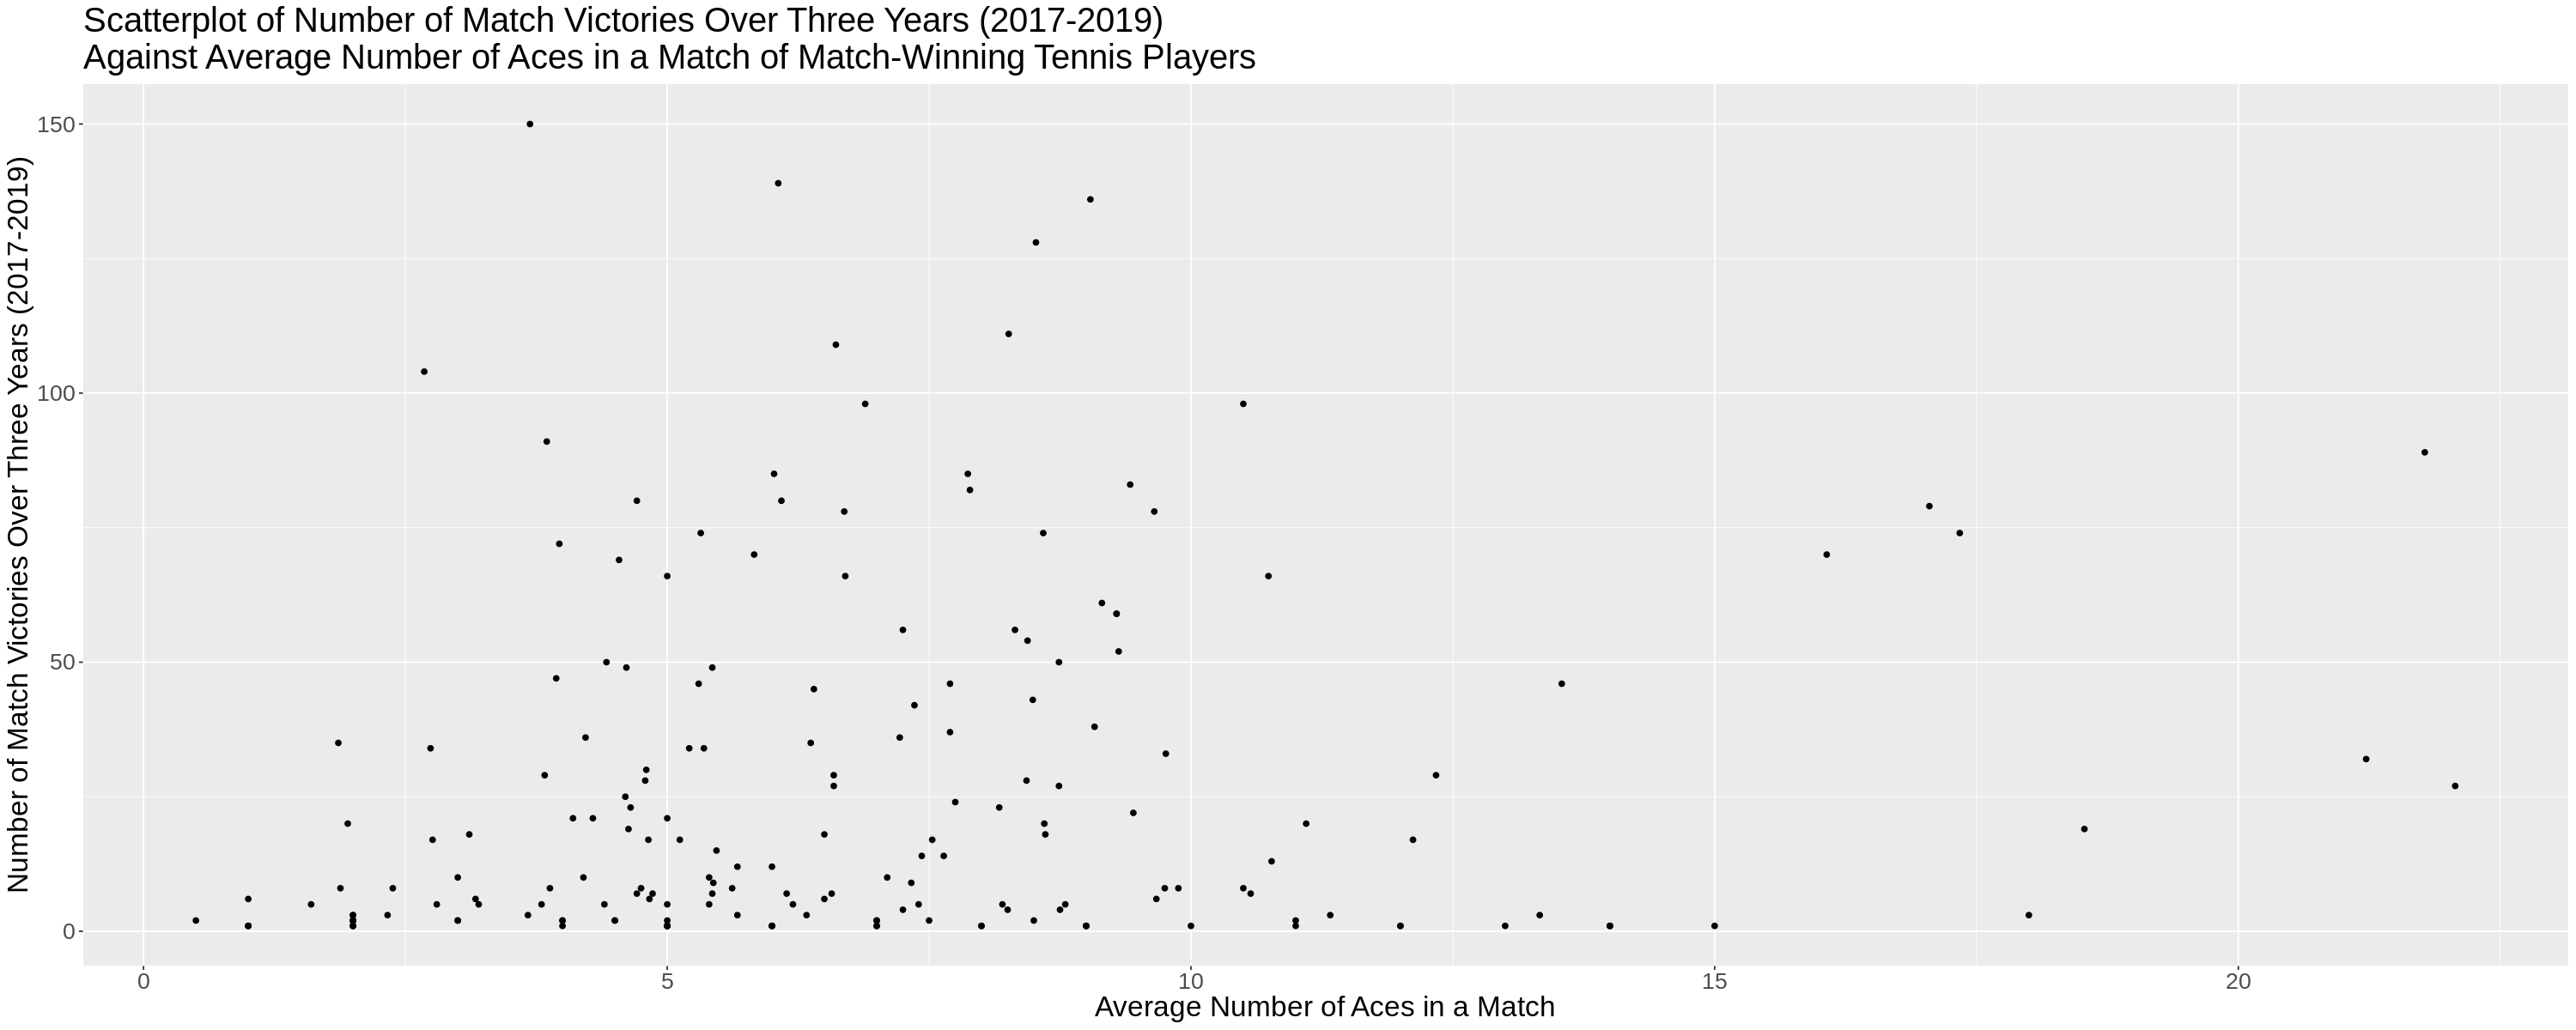

In [16]:
options(repr.plot.width = 25, repr.plot.height = 10)

ace_scatterplot <- data_train%>%
    ggplot(aes(x=avg_ace, y=number_of_wins))+
    geom_point()+
    theme (text = element_text (size = 20))+
    labs(x="Average Number of Aces in a Match", y="Number of Match Victories Over Three Years (2017-2019)")+
    ggtitle("Scatterplot of Number of Match Victories Over Three Years (2017-2019)\nAgainst Average Number of Aces in a Match of Match-Winning Tennis Players")
ace_scatterplot

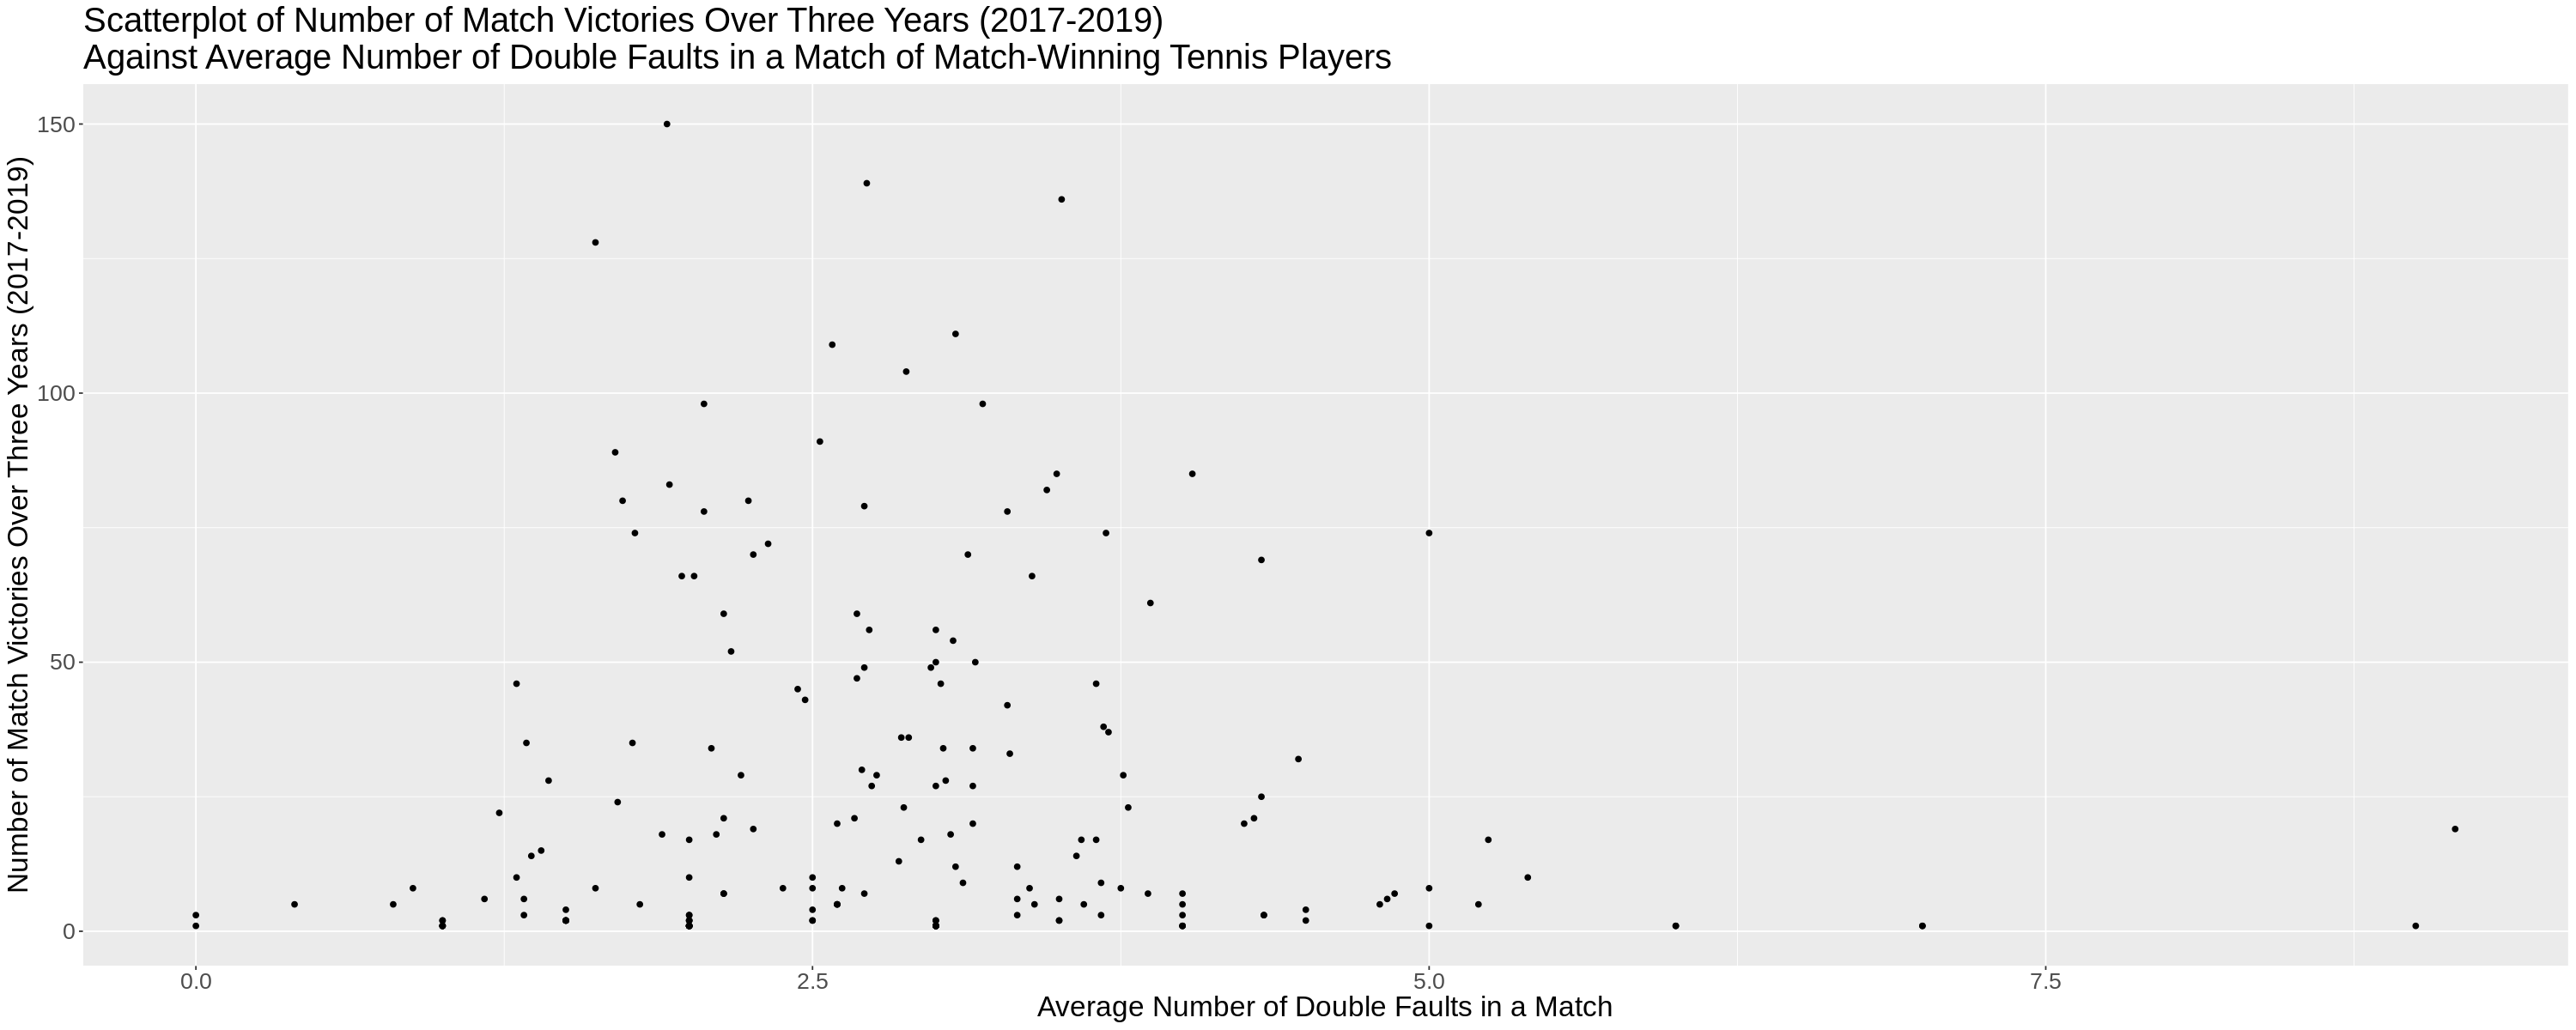

In [17]:
options(repr.plot.width = 25, repr.plot.height = 10)

df_scatterplot <- data_train%>%
    ggplot(aes(x=avg_df, y=number_of_wins))+
    geom_point()+
    theme (text = element_text (size = 20))+
    labs(x="Average Number of Double Faults in a Match", y="Number of Match Victories Over Three Years (2017-2019)")+
    ggtitle("Scatterplot of Number of Match Victories Over Three Years (2017-2019)\nAgainst Average Number of Double Faults in a Match of Match-Winning Tennis Players")
df_scatterplot

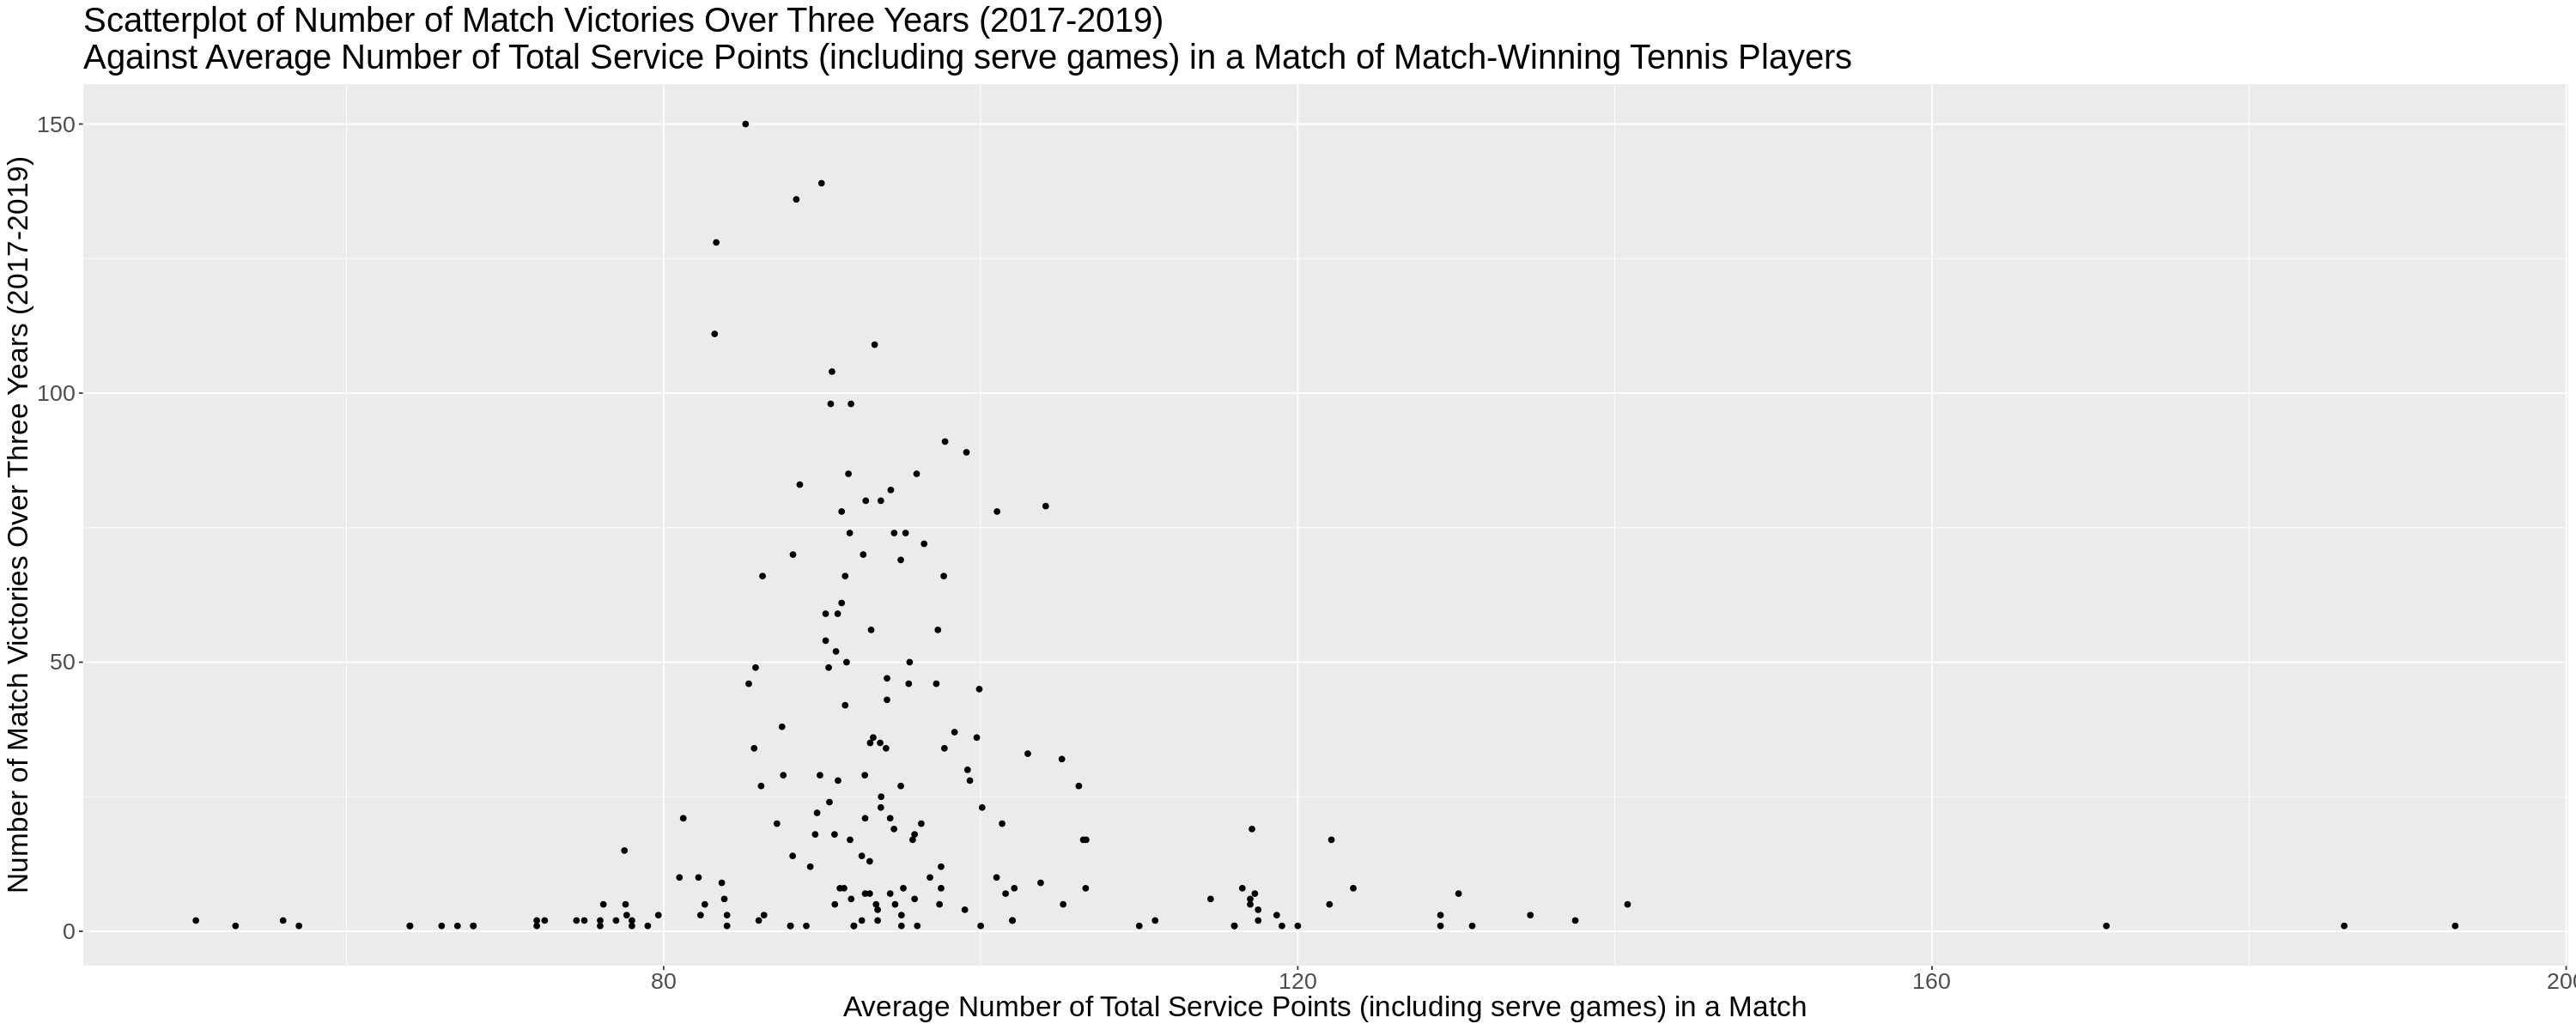

In [18]:
options(repr.plot.width = 25, repr.plot.height = 10)

svpt_scatterplot <- data_train%>%
    ggplot(aes(x=total_avg_svpt, y=number_of_wins))+
    geom_point()+
    theme (text = element_text (size = 20))+
    labs(x="Average Number of Total Service Points (including serve games) in a Match", y="Number of Match Victories Over Three Years (2017-2019)")+
    ggtitle("Scatterplot of Number of Match Victories Over Three Years (2017-2019)\nAgainst Average Number of Total Service Points (including serve games) in a Match of Match-Winning Tennis Players")
svpt_scatterplot

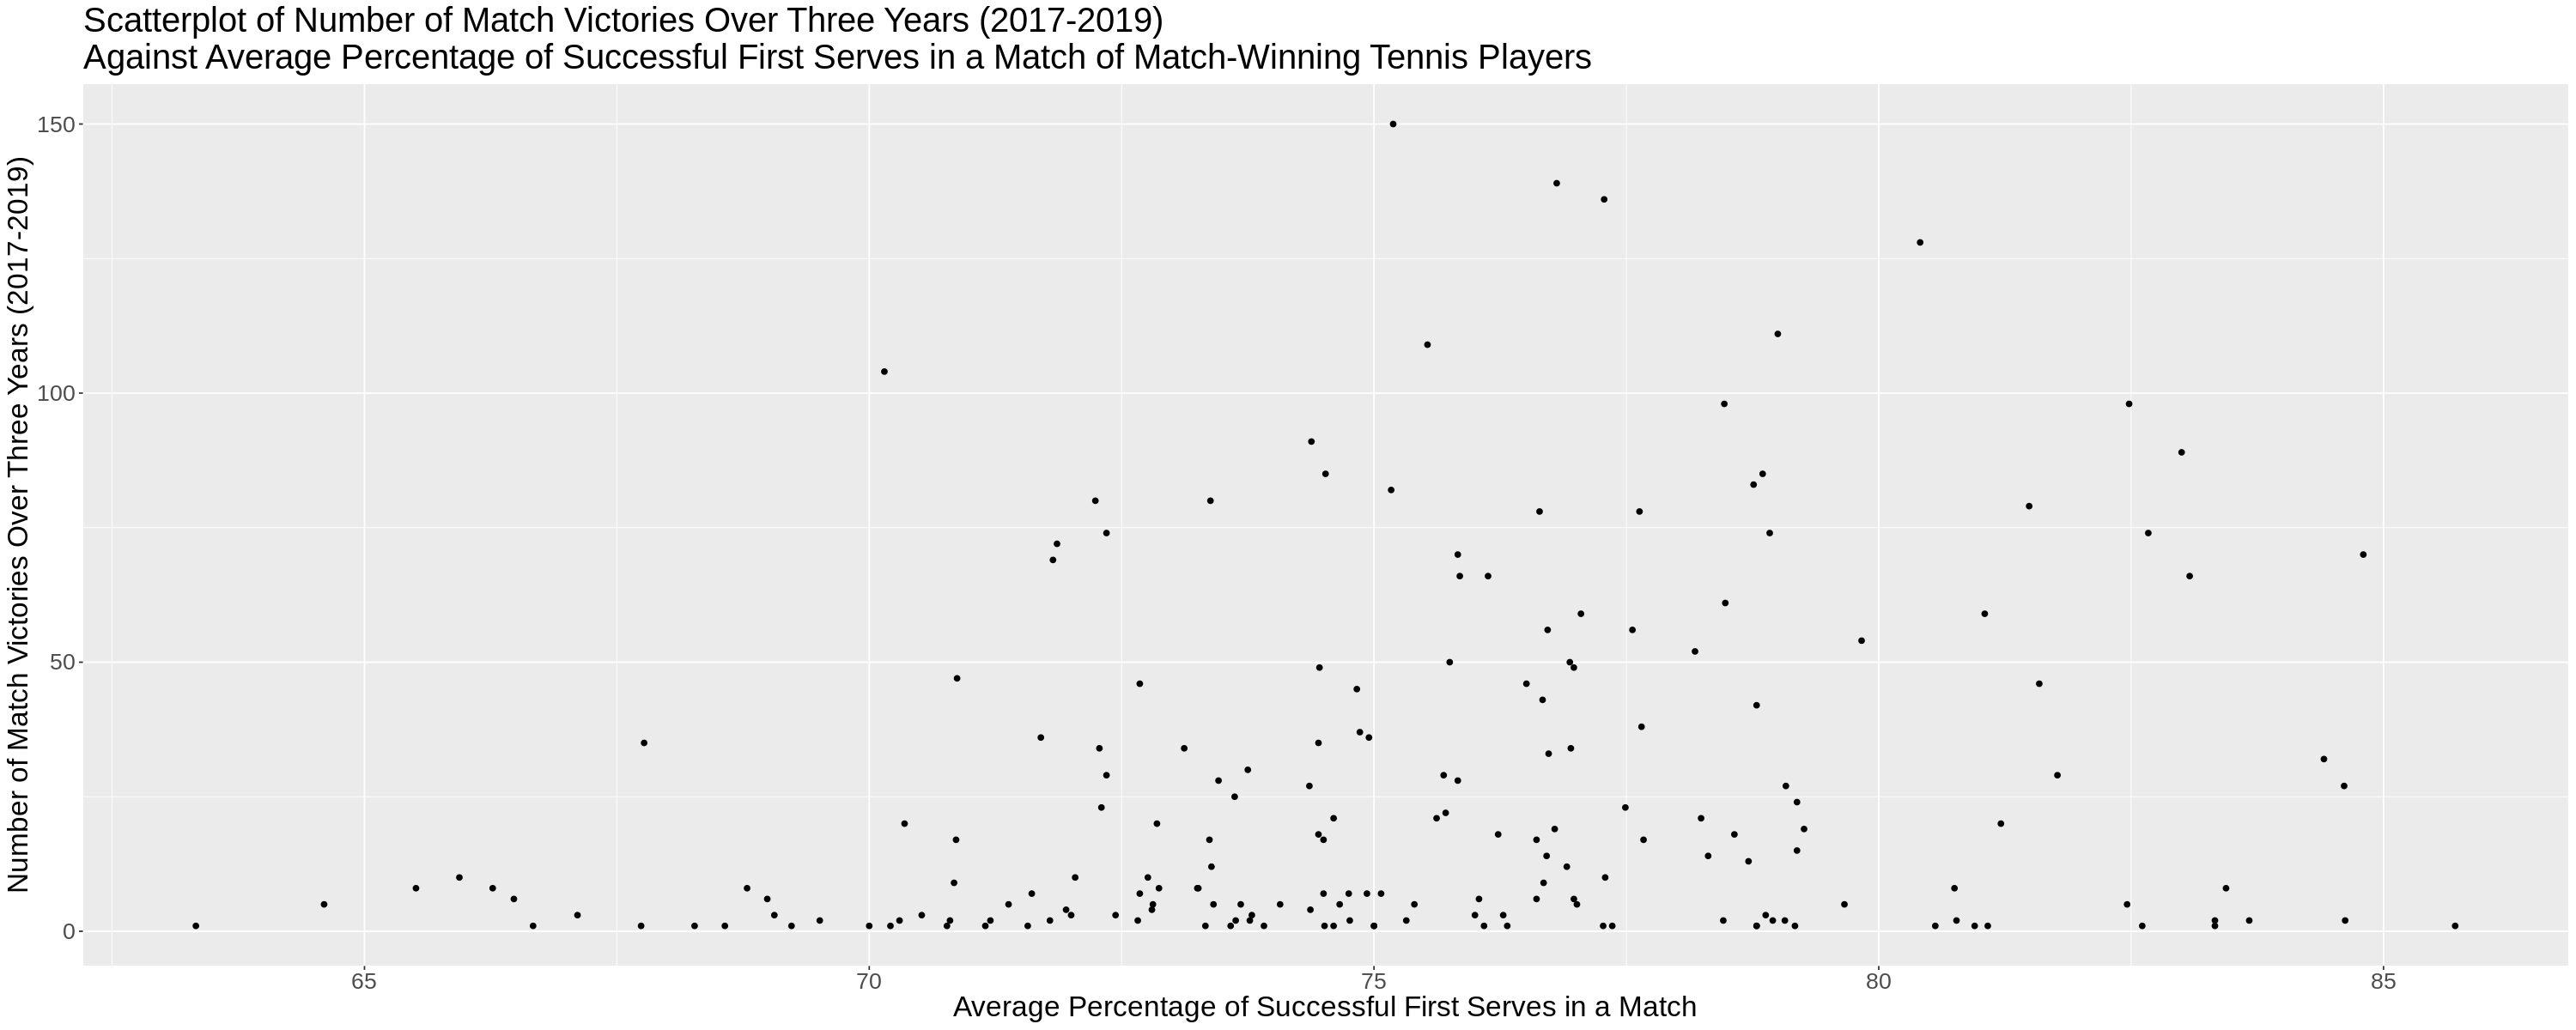

In [19]:
options(repr.plot.width = 25, repr.plot.height = 10)

first_scatterplot <- data_train%>%
    ggplot(aes(x=first_win_percentage_avg, y=number_of_wins))+
    geom_point()+
    theme (text = element_text (size = 20))+
    labs(x="Average Percentage of Successful First Serves in a Match", y="Number of Match Victories Over Three Years (2017-2019)")+
    ggtitle("Scatterplot of Number of Match Victories Over Three Years (2017-2019)\nAgainst Average Percentage of Successful First Serves in a Match of Match-Winning Tennis Players")
first_scatterplot